# Python/Data Visualization/Feature Engineering  Assignment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder

## Load csv file in notebook using python code 

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

## Explore Data using python code 

**Total Records**

In [3]:
df.shape

(5110, 12)

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**Null Count**

In [7]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

**Mean**

In [9]:
mean_values = df[numeric_columns].mean()
mean_values

id                   36517.829354
age                     43.226614
hypertension             0.097456
heart_disease            0.054012
avg_glucose_level      106.147677
bmi                     28.893237
stroke                   0.048728
dtype: float64

**Median**

In [10]:
median_values = df[numeric_columns].median()
median_values

id                   36932.000
age                     45.000
hypertension             0.000
heart_disease            0.000
avg_glucose_level       91.885
bmi                     28.100
stroke                   0.000
dtype: float64

**Standard Deviation**

In [11]:
std_dev_values = df[numeric_columns].std()
std_dev_values

id                   21161.721625
age                     22.612647
hypertension             0.296607
heart_disease            0.226063
avg_glucose_level       45.283560
bmi                      7.854067
stroke                   0.215320
dtype: float64

## Bar Chart: Gender Distribution

In [12]:
# df['gender'].unique()
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

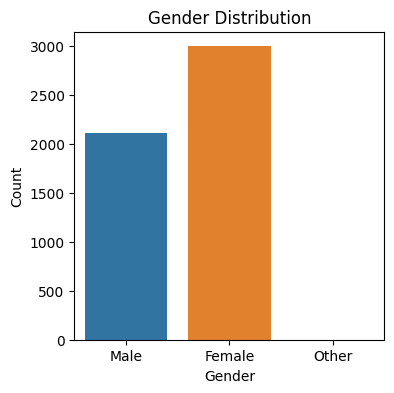

In [13]:
plt.figure(figsize = (4,4))
sns.countplot(x='gender',data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
# plt.ylim(0,100)
plt.show()

Explaination: The bar chart provides a clear and Concise representation of the gender distribution in the dataset. it is evident that "Female" is the dominant gender category, while "Male" follows closely, and there is only one individual classified as "other".

## Pie Chart: Smoking Status Distribution

In [14]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

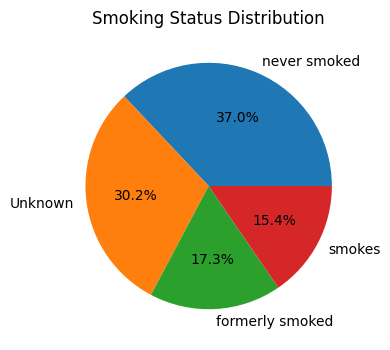

In [15]:
plt.figure(figsize = (4,4))
plt.pie(df['smoking_status'].value_counts(), labels = df['smoking_status'].value_counts().index, autopct = '%1.1f%%' )
plt.title('Smoking Status Distribution')
plt.show()

Explaination:
The pie chart provides an overview of the smoking status distribution in the dataset. 
The segment labeled "Never Smoked" (37.0%) shows that a significant proportion of individuals have never smoked.
The largest segment, "Unknown" (30.2%), indicates that the dataset has the highest proportion of individuals with an unknown smoking status. This could be due to missing or incomplete data for some individuals.
The "Formerly Smoked" segment (17.3%) represents individuals who used to smoke but hv  \ iti .
The smallest segment, "Smokes" (15.4%), indicates the proportion of individuals who are current smokers.

## Line Plot with Aggregated Averages: Age vs. Average Glucose Level

In [16]:
average_glucose_by_age = df.groupby('age')['avg_glucose_level'].mean()
average_glucose_by_age

age
0.08     105.000000
0.16      98.006667
0.24      94.112000
0.32      91.004000
0.40      97.605000
            ...    
78.00    119.664216
79.00    113.806824
80.00    119.772857
81.00    117.180167
82.00    130.483571
Name: avg_glucose_level, Length: 104, dtype: float64

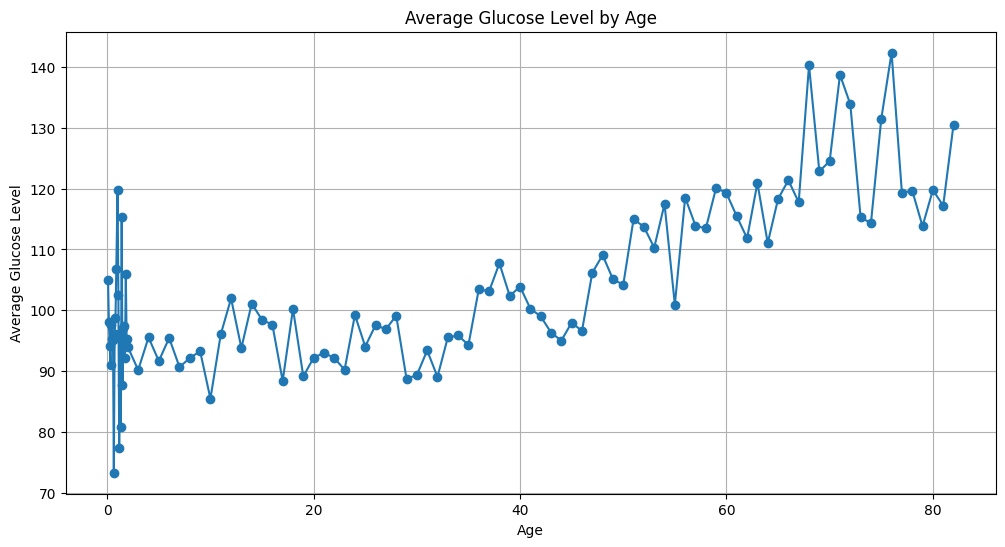

In [17]:

plt.figure(figsize=(12, 6))
plt.plot(average_glucose_by_age.index, average_glucose_by_age.values, marker='o', linestyle='-')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.title('Average Glucose Level by Age')
plt.grid(True)
plt.show()


Explaination: The line plot visually summarizes the average glucose level data with respect to age. It is crucial to consider the context of the dataset and the source of the data when interpreting the plot's insights.
The x-axis represents the "Age" values, ranging from 0.08 to 82.00 years, with each age being a unique value in the dataset.
The y-axis represents the "Average Glucose Level," showing the corresponding average glucose level for each age group.
As age increases along the x-axis, the average glucose level tends to change along the y-axis.
For example, at an age of 0.08 years (roughly one month old), the average glucose level is 105.000000, while at an age of 82.00 years, the average glucose level is 130.483571.

## Box Plot: Age Distribution by Stroke

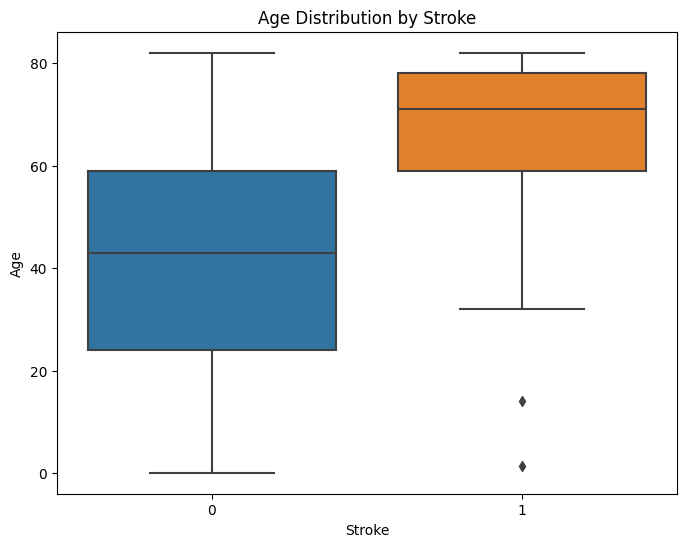

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='stroke', y='age', data=df)
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.title('Age Distribution by Stroke')
plt.show()


Explanation: This box plot presents the distribution of ages for individuals with and without a stroke. It uses boxes to represent the interquartile range (IQR) of age for each category (stroke "No" or "Yes"). The line inside the box indicates the median age, and the whiskers extend to the minimum and maximum non-outlier values within 1.5 times the IQR. Any data points outside the whiskers are considered outliers. This visualization allows us to compare the age distribution between stroke and non-stroke groups.

## Heatmap: Correlation Matrix

In [19]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df = numeric_df.drop(columns='id')
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5110 non-null   float64
 1   hypertension       5110 non-null   int64  
 2   heart_disease      5110 non-null   int64  
 3   avg_glucose_level  5110 non-null   float64
 4   bmi                4909 non-null   float64
 5   stroke             5110 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 239.7 KB


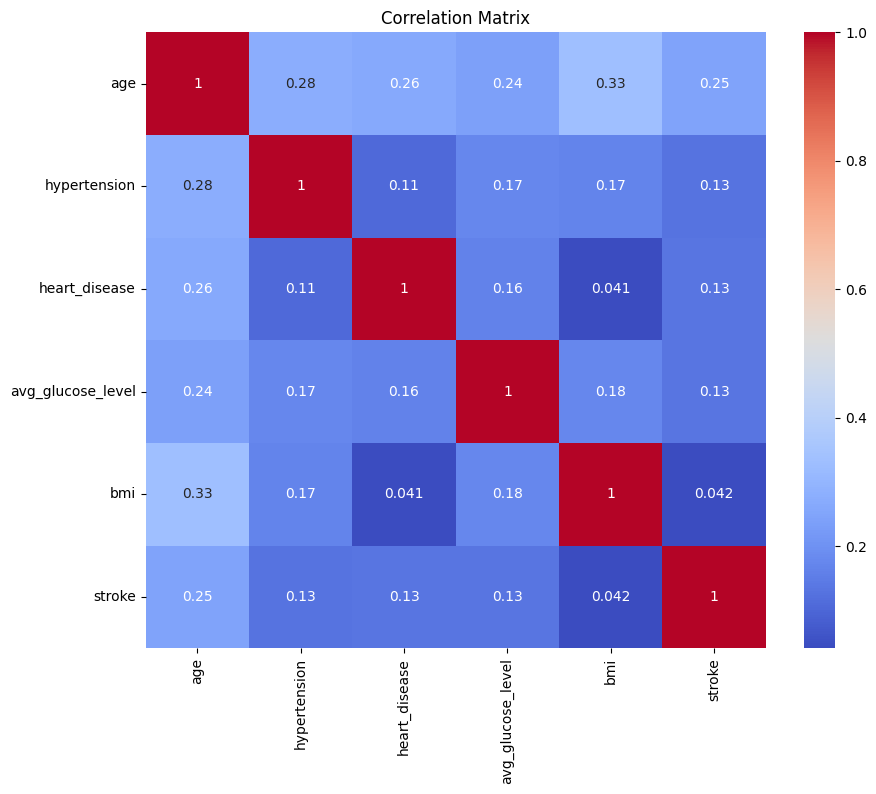

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Interpretation of the Correlation Matrix:

Age vs. Hypertension: The correlation coefficient between "age" and "hypertension" is 0.28. This positive correlation suggests that there is a weak positive relationship between a person's age and the likelihood of having hypertension.

Age vs. Heart Disease: The correlation coefficient between "age" and "heart_disease" is 0.26. This positive correlation indicates a weak positive relationship between age and the likelihood of having heart disease.

Age vs. Average Glucose Level: The correlation coefficient between "age" and "avg_glucose_level" is 0.24. This positive correlation suggests a weak positive relationship between age and the average glucose level.

Age vs. BMI: The correlation coefficient between "age" and "bmi" is 0.33. This positive correlation indicates a weak positive relationship between age and body mass index (BMI).

Age vs. Stroke: The correlation coefficient between "age" and "stroke" is 0.25. This positive correlation suggests a weak positive relationship between age and the likelihood of having a stroke.

Hypertension vs. Heart Disease: The correlation coefficient between "hypertension" and "heart_disease" is 0.11. This positive correlation indicates a weak positive relationship between having hypertension and having heart disease.

Hypertension vs. Average Glucose Level: The correlation coefficient between "hypertension" and "avg_glucose_level" is 0.17. This positive correlation suggests a weak positive relationship between hypertension and average glucose levels.

Hypertension vs. BMI: The correlation coefficient between "hypertension" and "bmi" is 0.17. This positive correlation indicates a weak positive relationship between hypertension and BMI.

Hypertension vs. Stroke: The correlation coefficient between "hypertension" and "stroke" is 0.13. This positive correlation suggests a weak positive relationship between hypertension and the likelihood of having a stroke.

Heart Disease vs. Average Glucose Level: The correlation coefficient between "heart_disease" and "avg_glucose_level" is 0.16. This positive correlation indicates a weak positive relationship between heart disease and average glucose levels.

Heart Disease vs. BMI: The correlation coefficient between "heart_disease" and "bmi" is 0.041. This positive correlation suggests a weak positive relationship between heart disease and BMI.

Heart Disease vs. Stroke: The correlation coefficient between "heart_disease" and "stroke" is 0.13. This positive correlation indicates a weak positive relationship between heart disease and the likelihood of having a stroke.

Average Glucose Level vs. BMI: The correlation coefficient between "avg_glucose_level" and "bmi" is 0.18. This positive correlation suggests a weak positive relationship between average glucose levels and BMI.

Average Glucose Level vs. Stroke: The correlation coefficient between "avg_glucose_level" and "stroke" is 0.13. This positive correlation indicates a weak positive relationship between average glucose levels and the likelihood of having a stroke.

BMI vs. Stroke: The correlation coefficient between "bmi" and "stroke" is 0.042. This positive correlation suggests a weak positive relationship between BMI and the likelihood of having a stroke.

### Check if “BMI” column has null values? what is the percentage of null values ? use data engineering method to fill the null values.

In [21]:
bmi_null_count = df['bmi'].isnull().sum()

total_rows = df.shape[0]
percentage_null_values = (bmi_null_count / total_rows) * 100


print(f"Number of null values in 'BMI' column:{bmi_null_count}")
print(f"Percentage of null values in 'BMI' column: {percentage_null_values:.2f}%")

Number of null values in 'BMI' column:201
Percentage of null values in 'BMI' column: 3.93%


In [22]:
mean_bmi = df['bmi'].mean()
mean_bmi

28.893236911794666

In [23]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [24]:
df['bmi'].fillna(mean_bmi, inplace=True)

In [25]:
df['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

## Remove outliers from any two numerical columns 
### Formula Z-score = |(x-mean)/std|

In [26]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


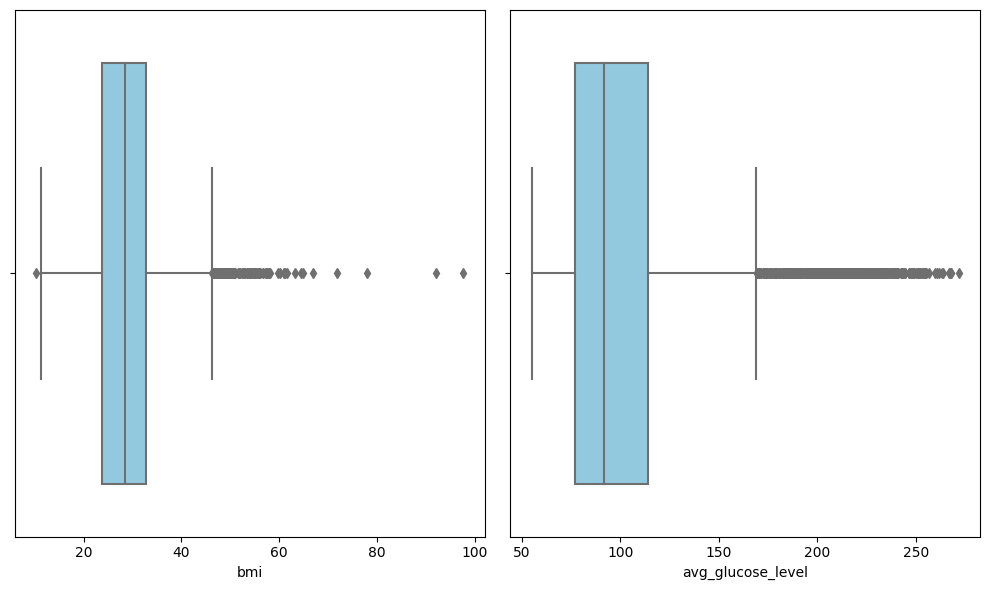

In [27]:
numeric_columns = ['bmi', 'avg_glucose_level']

plt.figure(figsize=(10, 6))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x=df[column], color='skyblue')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

In [28]:

def remove_outliers_zscore(data, column, threshold=1):
    z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())
    return data[z_scores <= threshold]

for column in numeric_columns:
    df = remove_outliers_zscore(df, column)



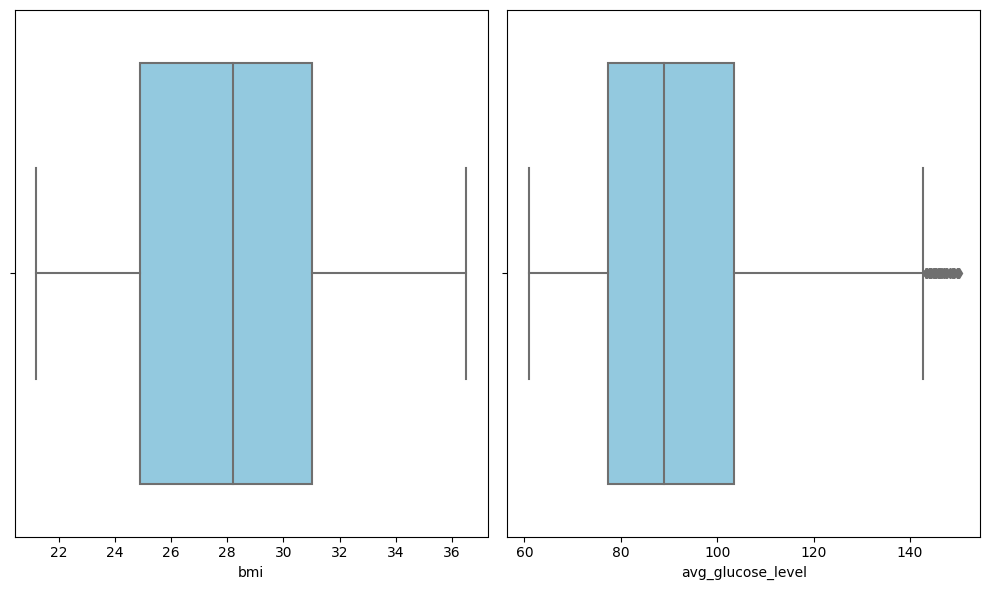

In [29]:
plt.figure(figsize=(10, 6))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x=df[column], color='skyblue')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

In [30]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.700000,never smoked,1


## Perform Scaling on all numerical columns

In [31]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,34971.225295,45.458860,0.078921,0.049241,91.875514,28.110222,0.044182
std,21152.345352,20.411562,0.269660,0.216408,19.366129,3.922679,0.205534
min,67.000000,0.480000,0.000000,0.000000,60.910000,21.200000,0.000000
25%,16378.000000,29.000000,0.000000,0.000000,77.370000,24.900000,0.000000
50%,33960.000000,46.000000,0.000000,0.000000,89.030000,28.200000,0.000000
75%,53095.000000,61.000000,0.000000,0.000000,103.580000,31.000000,0.000000
max,72918.000000,82.000000,1.000000,1.000000,150.100000,36.500000,1.000000


In [32]:

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = numeric_columns.drop(['id'])


scaler = StandardScaler()
# scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


In [33]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,2965.000000,2.965000e+03,2.965000e+03,2.965000e+03,2.965000e+03,2.965000e+03,2.965000e+03
mean,34971.225295,-4.457368e-16,-2.875721e-17,-9.585737e-18,-2.899685e-16,-8.555270e-16,1.917147e-17
std,21152.345352,1.000169e+00,1.000169e+00,1.000169e+00,1.000169e+00,1.000169e+00,1.000169e+00
min,67.000000,-2.203969e+00,-2.927164e-01,-2.275773e-01,-1.599222e+00,-1.761905e+00,-2.149986e-01
25%,16378.000000,-8.064859e-01,-2.927164e-01,-2.275773e-01,-7.491410e-01,-8.185128e-01,-2.149986e-01
50%,33960.000000,2.651591e-02,-2.927164e-01,-2.275773e-01,-1.469573e-01,2.289085e-02,-2.149986e-01
75%,53095.000000,7.615175e-01,-2.927164e-01,-2.275773e-01,6.044811e-01,7.368091e-01,-2.149986e-01
max,72918.000000,1.790520e+00,3.416276e+00,4.394112e+00,3.007018e+00,2.139149e+00,4.651192e+00


## Perform Encoding on all categorical columns

#### One-Hot Encoding on Nominal data

In [34]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,31112,Male,1.692519,-0.292716,4.394112,Yes,Private,Rural,0.725331,1.119265,never smoked,4.651192
6,53882,Male,1.398519,3.416276,4.394112,Yes,Private,Rural,-1.125118,-0.181086,never smoked,4.651192
7,10434,Female,1.153518,-0.292716,-0.227577,No,Private,Urban,0.129861,-1.353952,never smoked,4.651192
8,27419,Female,0.663517,-0.292716,-0.227577,Yes,Private,Rural,-0.812148,0.199646,Unknown,4.651192
10,12109,Female,1.741520,3.416276,-0.227577,Yes,Private,Rural,-0.591107,0.405347,never smoked,4.651192


In [35]:
nominal_columns = ['gender', 'work_type', 'Residence_type', 'smoking_status']
df = pd.get_dummies(df, columns=nominal_columns)

In [36]:
df.head()

,id,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2,31112,1.692519,-0.292716,4.394112,Yes,0.725331,1.119265,4.651192,False,True,...,False,True,False,False,True,False,False,False,True,False
6,53882,1.398519,3.416276,4.394112,Yes,-1.125118,-0.181086,4.651192,False,True,...,False,True,False,False,True,False,False,False,True,False
7,10434,1.153518,-0.292716,-0.227577,No,0.129861,-1.353952,4.651192,True,False,...,False,True,False,False,False,True,False,False,True,False
8,27419,0.663517,-0.292716,-0.227577,Yes,-0.812148,0.199646,4.651192,True,False,...,False,True,False,False,True,False,True,False,False,False
10,12109,1.741520,3.416276,-0.227577,Yes,-0.591107,0.405347,4.651192,True,False,...,False,True,False,False,True,False,False,False,True,False


#### label-Encoding

In [37]:

label_encoder = LabelEncoder()
df['ever_married_encoded'] = label_encoder.fit_transform(df['ever_married'])

# Display the encoded DataFrame
print(df[['ever_married', 'ever_married_encoded']].head(5))


   ever_married  ever_married_encoded
2           Yes                     1
6           Yes                     1
7            No                     0
8           Yes                     1
10          Yes                     1


## Generate at least 2 new features using existing features of your choice

In [38]:
df['bmi_age_ratio'] = df['bmi'] / df['age']
print(df[['bmi', 'age', 'bmi_age_ratio']].head())


         bmi       age  bmi_age_ratio
2   1.119265  1.692519       0.661301
6  -0.181086  1.398519      -0.129484
7  -1.353952  1.153518      -1.173758
8   0.199646  0.663517       0.300890
10  0.405347  1.741520       0.232755


In [39]:
df['avg_glucose_bmi_ratio'] = df['avg_glucose_level'] / df['bmi']
print(df[['bmi', 'age', 'avg_glucose_bmi_ratio']].head())

         bmi       age  avg_glucose_bmi_ratio
2   1.119265  1.692519               0.648042
6  -0.181086  1.398519               6.213179
7  -1.353952  1.153518              -0.095913
8   0.199646  0.663517              -4.067941
10  0.405347  1.741520              -1.458273
